In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
data_frame = pd.read_csv('D:/UO/Term-4/IAI-5101/Assignment-1/MedicalCentre.csv')

In [7]:
# Understanding the features 
data_frame.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
data_frame.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# 1. Dealing with missing values: 
# Dropping the duplicate rows and Checking for null values count in each column
data_frame=data_frame.drop_duplicates()
data_frame.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# 2. Frequency of distinct values in each feature set. (Comment/Uncomment)
data_frame['Age'].value_counts()
# data_frame['Gender'].value_counts()
# data_frame['ScheduledDay'].value_counts()
# data_frame['AppointmentDay'].value_counts()
# data_frame['Neighbourhood'].value_counts()
# data_frame['Scholarship'].value_counts()
# data_frame['Hipertension'].value_counts()
# data_frame['Diabetes'].value_counts()
# data_frame['Alcoholism'].value_counts()
# data_frame['Handcap'].value_counts()
# data_frame['SMS_received'].value_counts()
# data_frame['No-show'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
# 3. Plot all the features in the dataset to visualize for outliers
# As features have different Scales, It will make it hard to read charts if all of them are plotted together
# I am using group plots to group the features of the same scale and plotted them
data_frame_1 = data_frame[['Age']]
data_frame_2 = data_frame[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
# data_frame.hist(edgecolor="black", linewidth=1.2, figsize=[15,15])

C:\Users\RK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


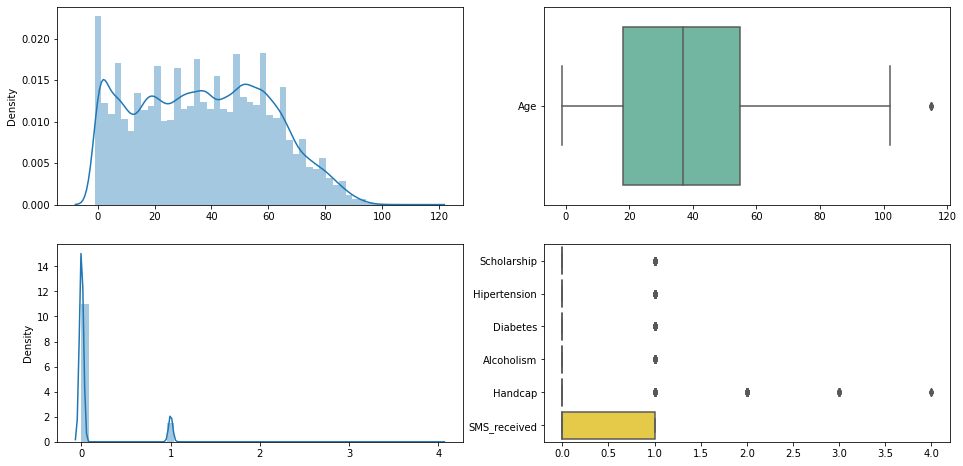

In [13]:
# Visualizing these separated features
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_frame_1)
plt.subplot(2,2,2)
sns.boxplot(data=data_frame_1, orient="h", palette="Set2")
plt.subplot(2,2,3)
sns.distplot(data_frame_2)
plt.subplot(2,2,4)
sns.boxplot(data=data_frame_2, orient="h", palette="Set2")
plt.show()

In [14]:
# 4. Count the frequency of negative Age features and remove them: 
#### From the question 2 output, we see that only one entry has a negative Age value of -1. Dropping it is done here
data_frame = data_frame[data_frame.Age > 0]
data_frame['Age'].value_counts()

1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

In [15]:
# 5. Awaiting Time negative values omission
# Creating the Awaiting Time column first. It is the difference between the appointment date and scheduled date.
data_frame['ScheduledDate'] = pd.to_datetime(data_frame['ScheduledDay'])
data_frame['AppointmentDate'] = pd.to_datetime(data_frame['AppointmentDay'])
data_frame['AwaitingTime'] = data_frame['AppointmentDate']-data_frame['ScheduledDate']

In [16]:
# 6. The Values of Awaiting Time tend to be negative. Taking their absolute values for uniformity.
data_frame['AwaitingTime'] = data_frame['AwaitingTime'].abs()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        106987 non-null  float64            
 1   AppointmentID    106987 non-null  int64              
 2   Gender           106987 non-null  object             
 3   ScheduledDay     106987 non-null  object             
 4   AppointmentDay   106987 non-null  object             
 5   Age              106987 non-null  int64              
 6   Neighbourhood    106987 non-null  object             
 7   Scholarship      106987 non-null  int64              
 8   Hipertension     106987 non-null  int64              
 9   Diabetes         106987 non-null  int64              
 10  Alcoholism       106987 non-null  int64              
 11  Handcap          106987 non-null  int64              
 12  SMS_received     106987 non-null  int64              
 13 

In [17]:
# 6. Encoding Categorical values to integer codes
# 3 features are non numeric: Gender, No-Show and Neighborhood.
# Encoding Gender through mapping as it is a binary feature
data_frame['Gender'] = data_frame['Gender'].map({'M':1, 'F':0})
data_frame

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0 days 18:38:08
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0 days 16:08:27
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0 days 16:19:04
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0 days 17:29:31
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0 days 16:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,34 days 14:44:25
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,34 days 16:32:27
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,40 days 07:56:08
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,40 days 08:50:37


In [18]:
# Encoding No Show through mapping as it is a binary feature
data_frame['No-show'] = data_frame['No-show'].map({'Yes':1, 'No':0})
data_frame

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0 days 18:38:08
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0 days 16:08:27
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0 days 16:19:04
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0 days 17:29:31
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0 days 16:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,34 days 14:44:25
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,34 days 16:32:27
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,40 days 07:56:08
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,40 days 08:50:37


In [19]:
# Label Encoding the Neighbourhood feature
label_encoder = LabelEncoder()
data_frame['Neighbourhood'] = label_encoder.fit_transform(data_frame['Neighbourhood'])
data_frame.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0 days 18:38:08
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0 days 16:08:27
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0 days 16:19:04
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0 days 17:29:31
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0 days 16:07:23


In [20]:
# 7 Splitting the date features to date components
data_frame['Scheduled_Year'] = data_frame['ScheduledDate'].dt.day
data_frame['Scheduled_Month'] = data_frame['ScheduledDate'].dt.month
data_frame['Scheduled_Day'] = data_frame['ScheduledDate'].dt.day


In [21]:
data_frame['Appointment_Year'] = data_frame['AppointmentDate'].dt.day
data_frame['Appointment_Month'] = data_frame['AppointmentDate'].dt.month
data_frame['Appointment_Day'] = data_frame['AppointmentDate'].dt.day

In [22]:
# Converting the Awaiting time feature to integral values from time delta before model training.
data_frame['AwaitingTime'] = data_frame['AwaitingTime'].dt.total_seconds()/ (24 * 60 * 60)

In [23]:
data_frame.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,ScheduledDate,AppointmentDate,AwaitingTime,Scheduled_Year,Scheduled_Month,Scheduled_Day,Appointment_Year,Appointment_Month,Appointment_Day
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,...,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0.776481,29,4,29,29,4,29
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,...,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0.672535,29,4,29,29,4,29
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,...,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0.679907,29,4,29,29,4,29
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,...,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0.728831,29,4,29,29,4,29
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,...,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0.671794,29,4,29,29,4,29


In [24]:
# 8 Min Max Normalization

# Creating a clone of the Dataframe for further operations.
df_minmax = data_frame.copy()
  
# apply normalization techniques
df_minmax['Age_norm'] = MinMaxScaler().fit_transform(np.array(df_minmax['Age']).reshape(-1,1))
  
# view normalized data  
df_minmax

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDate,AppointmentDate,AwaitingTime,Scheduled_Year,Scheduled_Month,Scheduled_Day,Appointment_Year,Appointment_Month,Appointment_Day,Age_norm
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,...,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0.776481,29,4,29,29,4,29,0.535088
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,...,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0.672535,29,4,29,29,4,29,0.482456
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,...,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0.679907,29,4,29,29,4,29,0.535088
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,...,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0.728831,29,4,29,29,4,29,0.061404
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,...,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0.671794,29,4,29,29,4,29,0.482456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,43,0,0,0,...,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,34.614178,3,5,3,7,6,7,0.482456
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,43,0,0,0,...,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,34.689201,3,5,3,7,6,7,0.438596
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,43,0,0,0,...,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,40.330648,27,4,27,7,6,7,0.175439
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,43,0,0,0,...,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,40.368484,27,4,27,7,6,7,0.324561


In [25]:
# Dropping the unnecessary columns from the normalized dataset before model training

df_minmax = df_minmax.drop(columns=['PatientId', 'Age', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'ScheduledDate', 'AppointmentDate', 'Scheduled_Year','Scheduled_Month', 'Scheduled_Day', 'Appointment_Year','Appointment_Month','Appointment_Day'])

# Checking the final contents of the dataset before the correlation step  
df_minmax

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,Age_norm
0,0,39,0,1,0,0,0,0,0,0.776481,0.535088
1,1,39,0,0,0,0,0,0,0,0.672535,0.482456
2,0,45,0,0,0,0,0,0,0,0.679907,0.535088
3,0,54,0,0,0,0,0,0,0,0.728831,0.061404
4,0,39,0,1,1,0,0,0,0,0.671794,0.482456
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,43,0,0,0,0,0,1,0,34.614178,0.482456
110523,0,43,0,0,0,0,0,1,0,34.689201,0.438596
110524,0,43,0,0,0,0,0,1,0,40.330648,0.175439
110525,0,43,0,0,0,0,0,1,0,40.368484,0.324561


In [26]:
# 9 Feature Comparison using correlation matrix
corr_matrix = df_minmax.corr().abs()
print(corr_matrix)

                 Gender  Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender         1.000000       0.008752     0.113679      0.051312  0.030027   
Neighbourhood  0.008752       1.000000     0.007543      0.006107  0.012501   
Scholarship    0.113679       0.007543     1.000000      0.024530  0.027622   
Hipertension   0.051312       0.006107     0.024530      1.000000  0.430827   
Diabetes       0.030027       0.012501     0.027622      0.430827  1.000000   
Alcoholism     0.110410       0.000592     0.033527      0.085459  0.016874   
Handcap        0.024920       0.011662     0.009890      0.078209  0.056377   
SMS_received   0.045852       0.018917     0.000010      0.008805  0.016136   
No-show        0.003238       0.008206     0.029370      0.037280  0.015928   
AwaitingTime   0.029385       0.002749     0.030141      0.018316  0.028126   
Age_norm       0.094108       0.011685     0.112699      0.502091  0.290631   

               Alcoholism   Handcap  SMS_received  

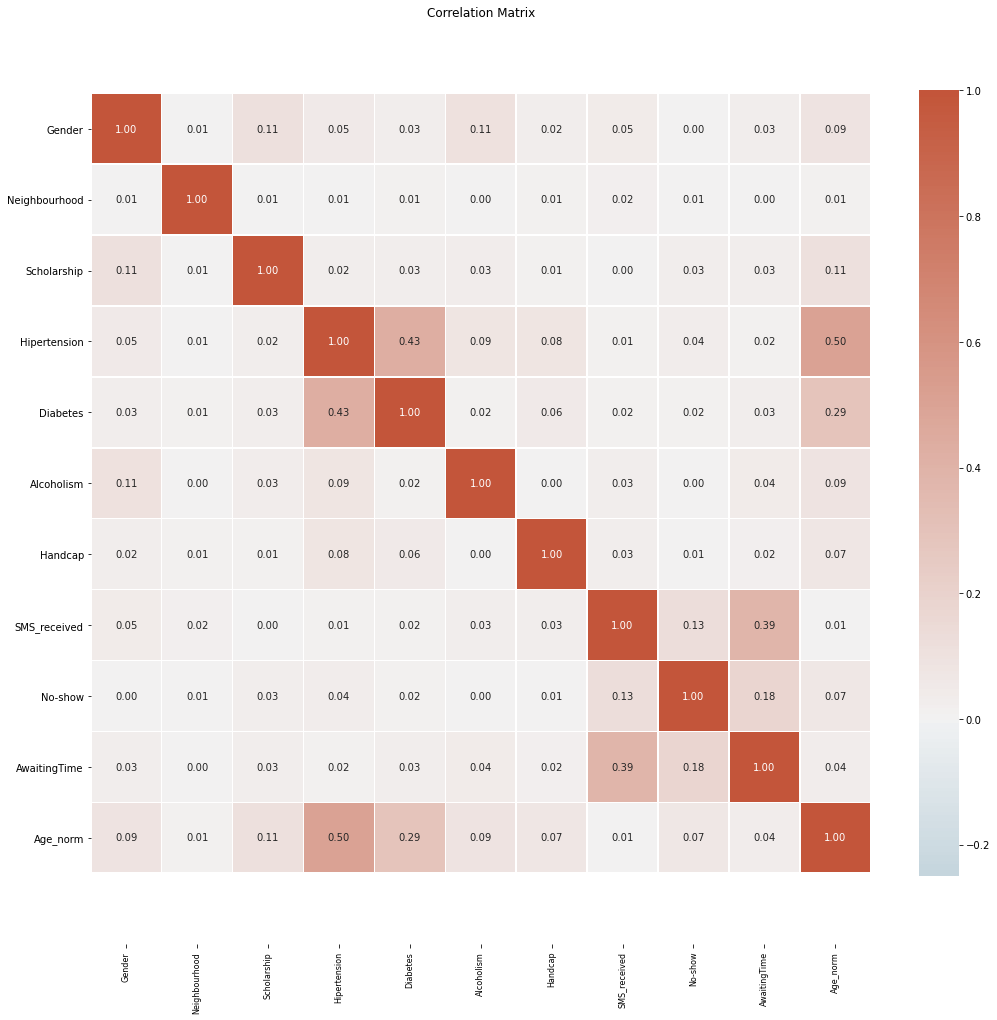

In [27]:
# Visualizing the correlation information in a bid to identify the threshold

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix,
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.2f', 
            annot_kws={'size': 10},
            cbar_kws={"shrink": .75})
plt.title('Correlation Matrix')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 8)
ax.set_ylim(len(corr_matrix)+1, -1)
plt.show()

In [28]:
# All the Features have correlation of lesser than 0.5, whereas we have been asked to set the threshold of 0.95.
# Dropping isn't necessary as the none of the features will get dropped due to less correlation.

In [29]:
df_minmax

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,Age_norm
0,0,39,0,1,0,0,0,0,0,0.776481,0.535088
1,1,39,0,0,0,0,0,0,0,0.672535,0.482456
2,0,45,0,0,0,0,0,0,0,0.679907,0.535088
3,0,54,0,0,0,0,0,0,0,0.728831,0.061404
4,0,39,0,1,1,0,0,0,0,0.671794,0.482456
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,43,0,0,0,0,0,1,0,34.614178,0.482456
110523,0,43,0,0,0,0,0,1,0,34.689201,0.438596
110524,0,43,0,0,0,0,0,1,0,40.330648,0.175439
110525,0,43,0,0,0,0,0,1,0,40.368484,0.324561


In [30]:
# Separating the output variable from the dataframe as that is the way we need to provide it to the model.
target_minmax = df_minmax['No-show']

In [31]:
# Removing the output variable from the input data frame
df_minmax = df_minmax.drop(columns=['No-show'])

In [32]:
################ B. Model Development ##################

# Splitting the dataset into 70% training and 30% testing

X_train, X_test, y_train, y_test= train_test_split(df_minmax,target_minmax,test_size=0.3,random_state=42)

In [33]:
nb_model_minmax = GaussianNB()
nb_model_minmax.fit(X_train, y_train)
minmax_pred = nb_model_minmax.predict(X_test)
minmax_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
################ C. Model Evaluation and Comparison ##################

#1. Function to detect the model's metrics from the confusion matrix
def metrics_function(test_values, pred_values):
    con_mat = confusion_matrix(test_values, pred_values)
    # Getting the individual values from the confusion matrix
    tn, fp, fn, tp = con_mat.ravel()
    # Accuracy = (TN+TP)/(TP+TN+FN+FP) where TP is True Positive, TN-> True Negative, FP -> False Positive and FN -> False Negative
    sum_con_mat = tn+fp+fn+tp
    accuracy_val = (tn+tp)/sum_con_mat
    
    # Sensitivity = TP/(TP+FN); wher FN -> False Negative and TP is True Positive
    sensitivity_val = tp/(tp+fn)
    
    # Specificity = TN/(TN+FP); wher TN -> True Negative and FP is False Positive
    specificity_val = tn/(tn+fp)
    
    return accuracy_val, sensitivity_val, specificity_val

# Checking the accuracy of the Naive Bayes Model
print(accuracy_score(y_test, minmax_pred))

0.7717232140075396


In [ ]:
# Was there Overfitting: Yes, because the number of no-show false values are relatively lesser than the number of no-show true values.
# This created the class imbalance problem, which can be visualized in the plot below.
# To solve this overfitting problem, we can go ahead with re-sampling 

<AxesSubplot:xlabel='No-show', ylabel='count'>

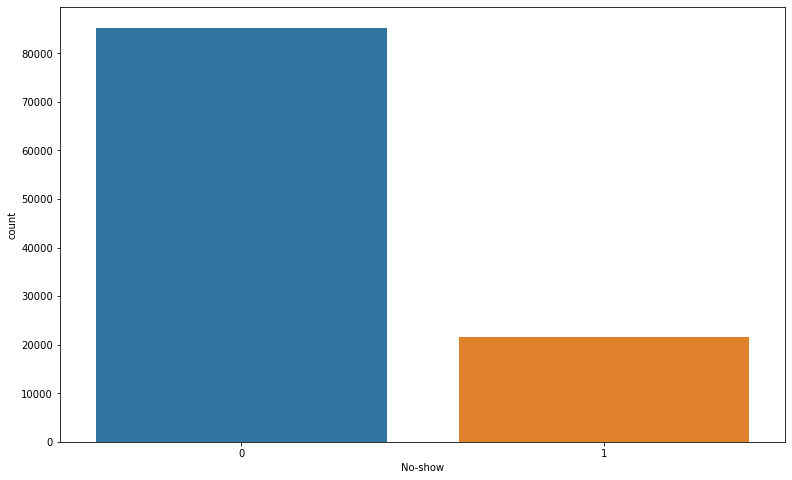

In [46]:
# Plot to visualize the class imbalance
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(data=data_frame, x='No-show')

In [35]:
# 2. Tuning the Naive Bayes Model using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Tuning parameters dictionary
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [36]:
# Train Test Splitting of the data for the tuned NB model building
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_minmax,target_minmax,test_size=0.3,random_state=42)

In [37]:
best_model= nbModel_grid.fit(X_train1, y_train1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [38]:
y_pred = best_model.predict(X_test1)

In [53]:
# Accuracy of the GridSearch tuned model
print(accuracy_score(y_test1, y_pred))

0.7962426394990186


In [ ]:
# We can see that tuning the hyperparameters for the Naive Bayes Model helped in improving the accuracy of the model.

In [40]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [54]:
print(accuracy_score(y_test, dt_pred))

0.7967411284543727


In [42]:
# Support Vector Machine (SVM) Classifier -- Takes a lot of time to run
from sklearn import svm

svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [55]:
print(accuracy_score(y_test, svm_pred))

0.7967411284543727


In [ ]:
# Comparing the results of models based on Accuracy Sensitivity and Specificity
# We already have the function that gives the accuracy of the model.
# Creating similar methods for sensitivity and specificity

In [62]:
# Getting the metrics for Naive Bayes Model
acc_val_nb, sen_value_nb, spec_value_nb = metrics_function(y_test, minmax_pred)
print(acc_val_nb)
print(sen_value_nb)
print(spec_value_nb)

0.7717232140075396
0.11756591048436542
0.9386071247018339


In [63]:
# Getting the metrics for Decision Tree Model
acc_val_dt, sen_value_dt, spec_value_dt = metrics_function(y_test, dt_pred)
print(acc_val_dt)
print(sen_value_dt)
print(spec_value_dt)

0.7967411284543727
0.0
1.0


In [64]:
# Getting the metrics for Support Vector Machine (SVM) Model
acc_val_svm, sen_value_svm, spec_value_svm = metrics_function(y_test, svm_pred)
print(acc_val_svm)
print(sen_value_svm)
print(spec_value_svm)

0.7967411284543727
0.0
1.0


In [ ]:
# Identifying best and worst performing models per each criterion
# Both Decision Tree and Support Vector Machine have better accuracy, sensitivity and specificity than Naive Bayes model for this Binary Calssification Problem
# However SVM is very much robust to outliers and inconsistent data, as it incorporates a score function
# Hence I believe SVM is the best suited model for this classification problem

0.5280865175930997


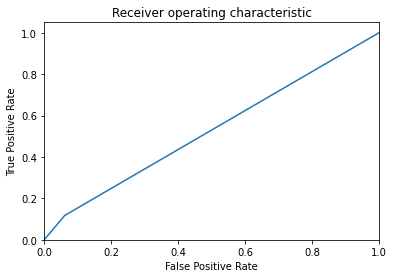

In [70]:
# 4. ROC Analysis to compare performance of the models
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Checking the ROC values of Naive Bayes
fpr = dict() # Initializing a dictionary for the false positive rate
tpr = dict() # Initializing a dictionary for the true positive rate
roc_auc = dict() # Result dictionary
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, minmax_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc_score(y_test, minmax_pred))
# Plotting the ROC graph for this model
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

0.5


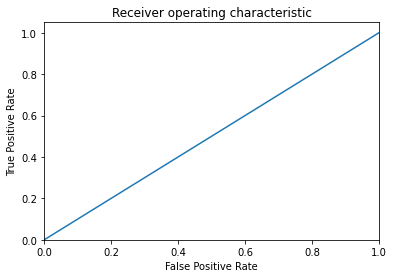

In [71]:
# Checking the ROC values of Decision Trees
fpr = dict() # Initializing a dictionary for the false positive rate
tpr = dict() # Initializing a dictionary for the true positive rate
roc_auc = dict() # Result dictionary
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, dt_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc_score(y_test, dt_pred))
# Plotting the ROC graph for this model
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

0.5


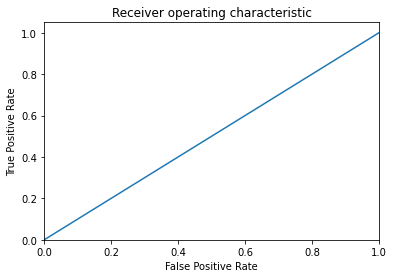

In [72]:
# Checking the ROC values of SVM
fpr = dict() # Initializing a dictionary for the false positive rate
tpr = dict() # Initializing a dictionary for the true positive rate
roc_auc = dict() # Result dictionary
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, svm_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc_score(y_test, svm_pred))
# Plotting the ROC graph for this model
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()